# Business Understanding

**Background**

New York City (NYC) adalah salah satu kota metropolis terbesar di dunia, dan sistem transportasi umumnya adalah salah satu yang paling ramai dan kompleks. Dalam keramaian dan hiruk pikuk NYC, taksi memainkan peran kritis dalam menyediakan layanan transportasi yang cepat dan fleksibel, mengisi celah yang mungkin tidak dijangkau oleh sistem subway dan bus.

**Problem Statement**

Dalam industri taksi, memahami pola permintaan pelanggan, preferensi wilayah, dan faktor-faktor yang mempengaruhi kepuasan pelanggan (misalnya, melalui tip) adalah kunci untuk mengoptimalkan operasi dan meningkatkan profitabilitas. Dengan menilai kapan dan di mana layanan paling dibutuhkan serta apa yang mendorong pelanggan memberikan apresiasi lebih, perusahaan dapat membuat keputusan yang lebih tepat tentang alokasi sumber daya, penetapan harga, dan inisiatif pelayanan pelanggan.

Meningkatkan profitabilitas layanan taksi dengan menganalisis perilaku dan preferensi pelanggan merupakan sebuah tantangan kompleks di era kompetisi digital yang ketat saat ini. Pemahaman mendalam tentang dinamika operasional dan pelayanan terhadap pelanggan menjadi fondasi utama untuk mengatasi tantangan ini. Dengan mengeksplorasi lebih dalam aspek-aspek tertentu dari operasional taksi, kita dapat menemukan solusi yang lebih spesifik dan terarah. Aspek-aspek tersebut diantaranya:

1. Variabilitas permintaan berdasarkan beberapa aspek seperti waktu, wilayah, dan prefensi pelanggan

2. Pendapatan berdasarkan wilayah dan jalur perjalanan

3. Faktor-faktor yang mempengaruhi besarnya tip

**Goals**

Memberikan insight terhadap stakeholder untuk membantu dalam strategi atau pembuatan keputusan terkait hal-hal berikut :

- Mengoptimalkan distribusi armada taksi berdasarkan pola permintaan pelanggan sehingga diharapkan menjadi lebih efisien terhadap biaya opersional.

- Memahami dan memenuhi preferensi serta kebutuhan pelanggan agar dapat meningkatkan loyalitas dan kepuasan pelanggan.

- Mengidentifikasi dan mengeksplorasi peluang pendapatan dengan menyesuaikan strategi penetapan harga, promosi, dan layanan tambahan berdasarkan analisis wilayah dan jalur perjalanan sehingga dapat memaksimalkan pendapatan.

- Mengidentifikasi faktor-faktor yang membuat pelanggan memberikan apresiasi lebih seperti tip.

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)
color = sns.color_palette("Paired")
scale = 'coolwarm_r'

# Load Dataset

In [2]:
with open(r'..\data\cleaned\NYC TLC Trip Record - Clean.csv', 'r')as file:
    clean_data = pd.read_csv(file)

In [3]:
df = clean_data.copy()
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone,passenger_count,trip_distance,distance_bins,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1.0,2.58,3-6 miles,14.9,<20$,4.03,1-5$,Credit card,Street-hail,11.02,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1.0,1.81,<2 miles,10.7,<20$,2.64,1-5$,Credit card,Street-hail,6.77,<10 minutes,16.04,11-20 mph
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1.0,1.30,<2 miles,6.5,<20$,1.70,1-5$,Credit card,Street-hail,5.82,<10 minutes,13.40,11-20 mph
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1.0,1.10,<2 miles,6.0,<20$,0.00,0$,Credit card,Street-hail,5.97,<10 minutes,11.06,11-20 mph
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1.0,2.78,3-6 miles,17.7,<20$,0.00,0$,Cash,Street-hail,17.55,11-20 minutes,9.50,<10 mph


# Skimming

In [4]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,object,0.0,0.0,0.000,0,59508,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,object,0.0,0.0,0.000,0,59493,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,day_category,object,0.0,0.0,0.000,0,2,"[Weekend, Weekdays]"
3,pickup_time,object,0.0,0.0,0.000,0,5,"[Midnight, Morning, Noon, Evening, Night]"
4,RatecodeID,object,0.0,0.0,0.000,0,4,"[Standard rate, Negotiated fare, JFK Airport, ..."
5,PULocationID,int64,0.0,0.0,0.000,0,192,"[166, 24, 41, 181, 255, 75, 66, 195, 83, 97, 7..."
6,PUBorough,object,0.0,0.0,0.000,0,5,"[Manhattan, Brooklyn, Queens, Bronx, Staten Is..."
7,PUZone,object,0.0,0.0,0.000,0,191,"[Morningside Heights, Bloomingdale, Central Ha..."
8,DOLocationID,int64,0.0,0.0,0.000,0,243,"[143, 43, 238, 74, 262, 45, 75, 166, 140, 234,..."
9,DOBorough,object,0.0,0.0,0.000,0,6,"[Manhattan, Brooklyn, Queens, Bronx, EWR, Stat..."


# Exploratory Data Analysis

## Categorical

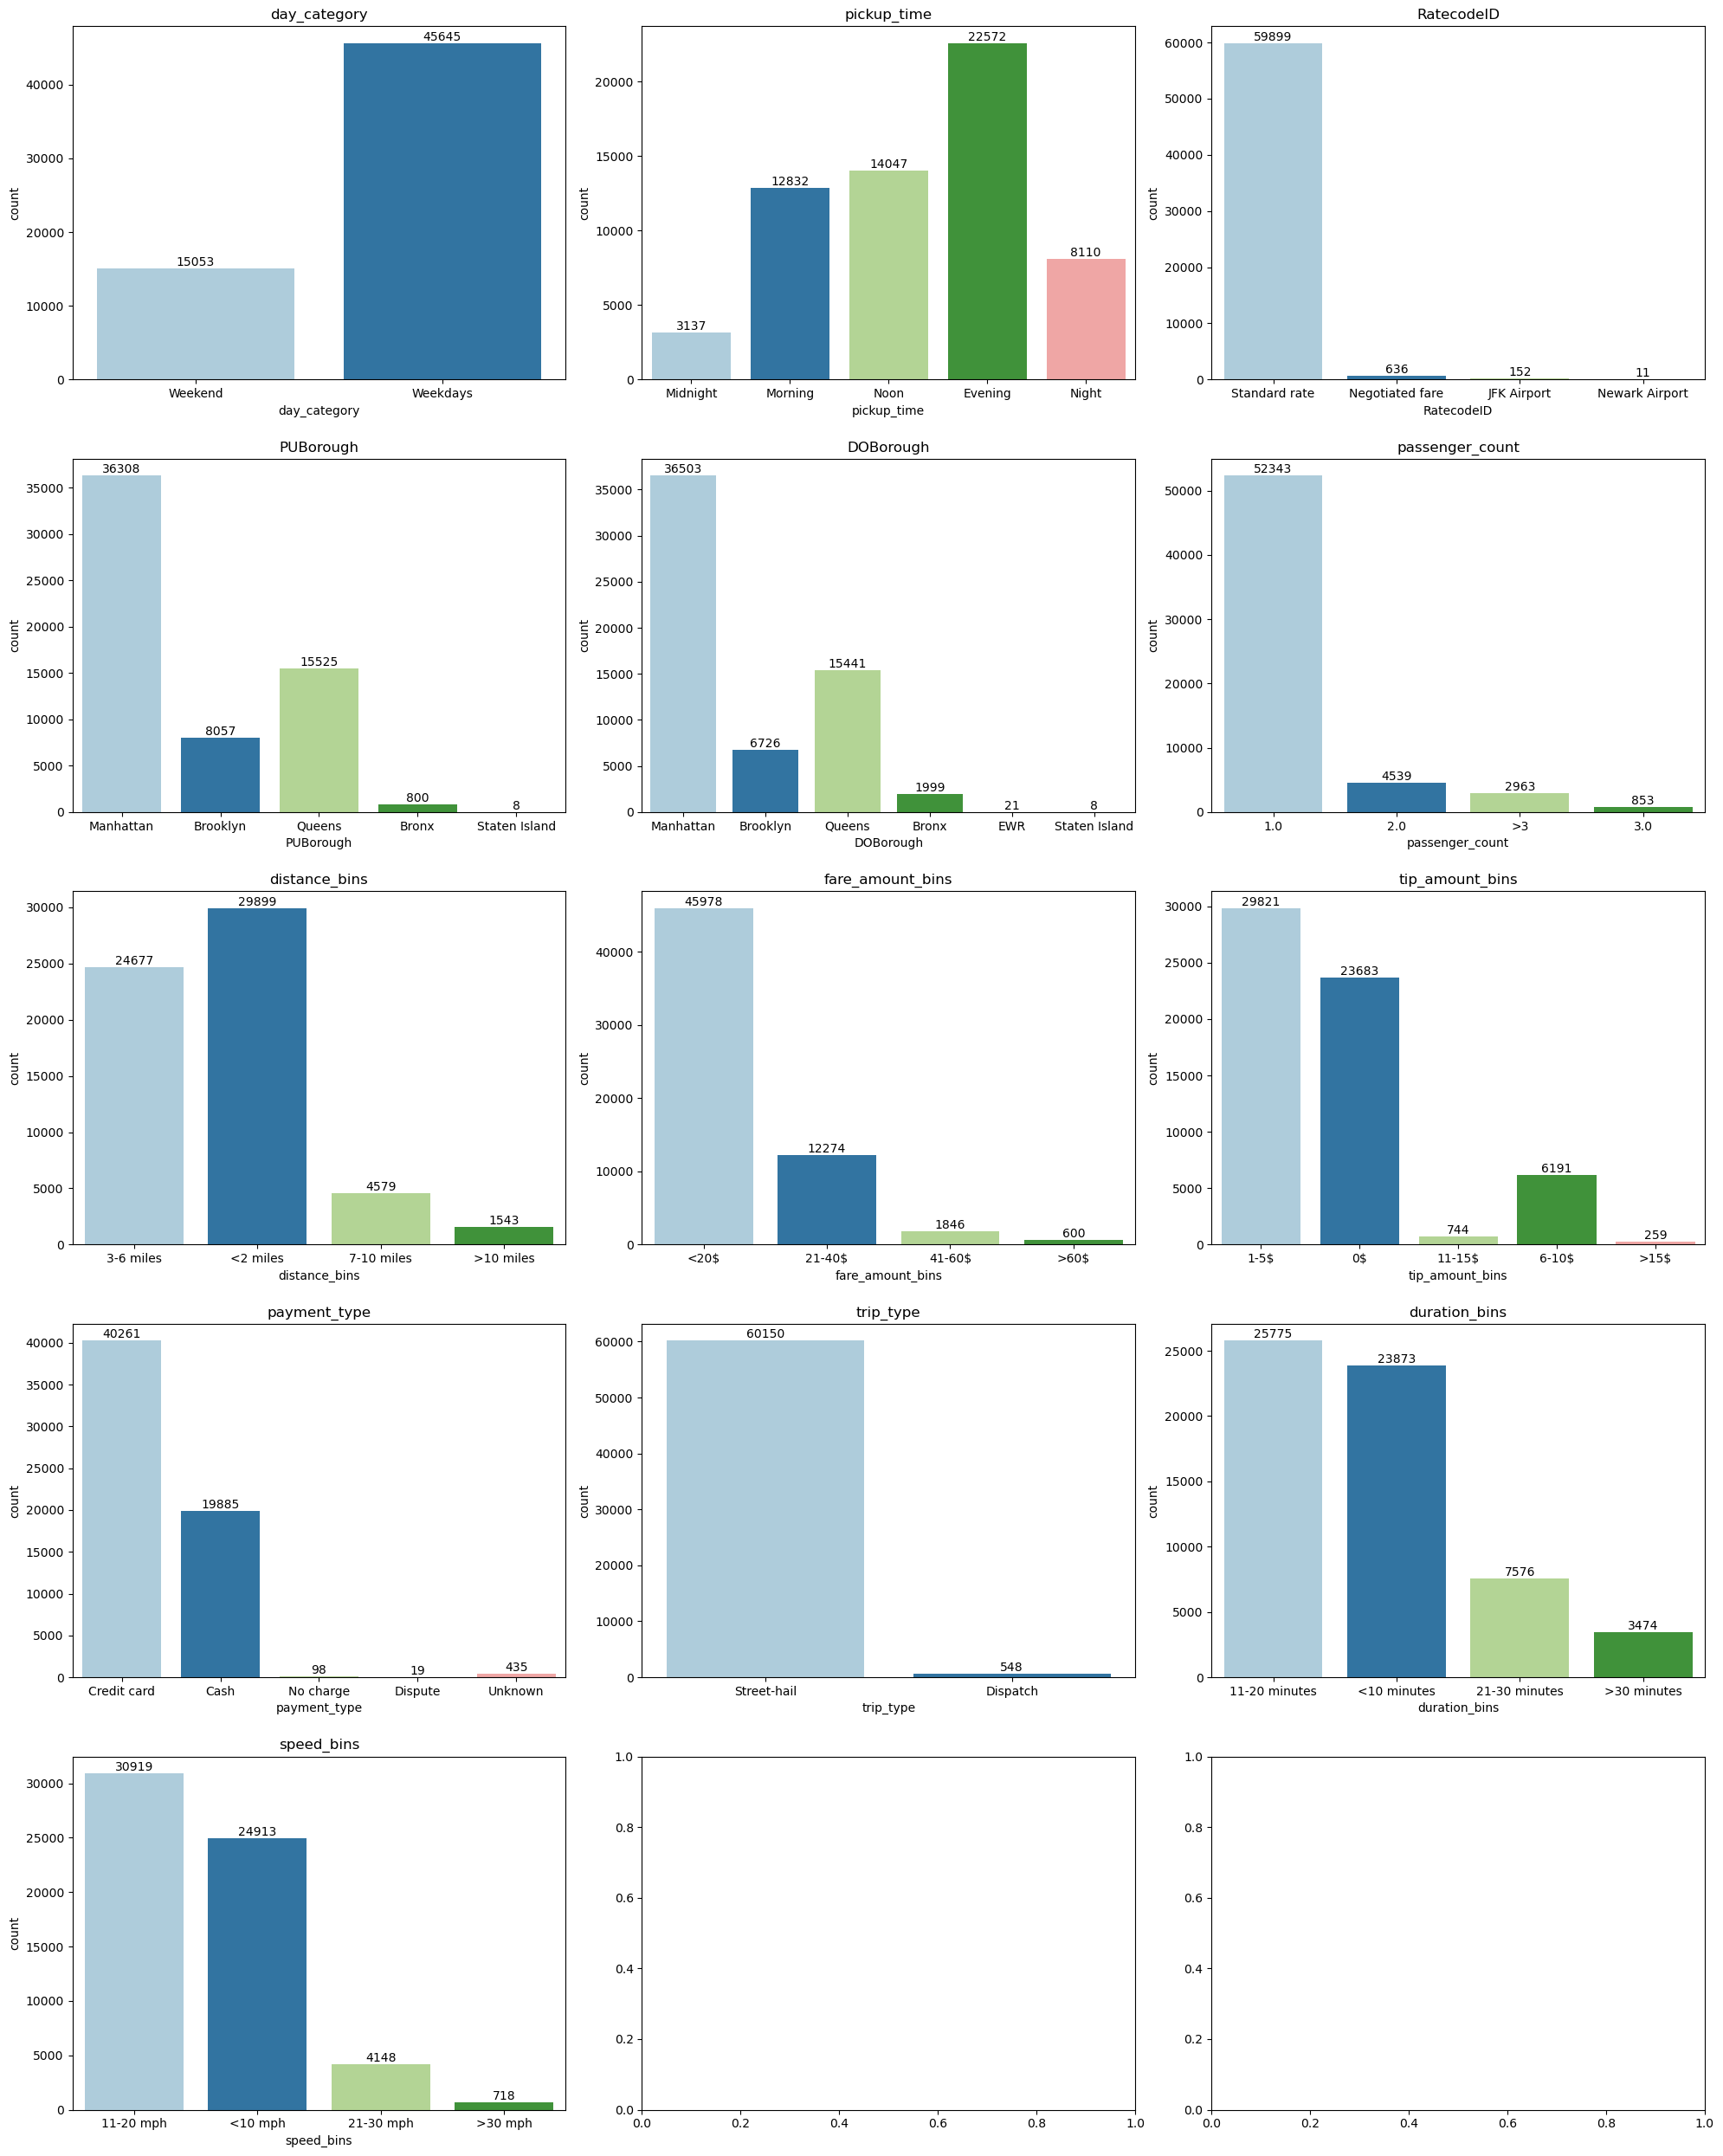

In [5]:
cols = ['day_category','pickup_time', 'RatecodeID', 'PUBorough', 'DOBorough', 'passenger_count', 'distance_bins', 'fare_amount_bins', 'tip_amount_bins', 'payment_type', 'trip_type', 'duration_bins', 'speed_bins']

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 25))
axs = axs.flatten()

for i, col in enumerate(cols):
    bars = sns.countplot(data=df, x=col, palette=color, ax=axs[i])
    axs[i].set_title(col)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axs[i].text(x_value, y_value, label, ha='center', va='bottom') 

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

## Numerical

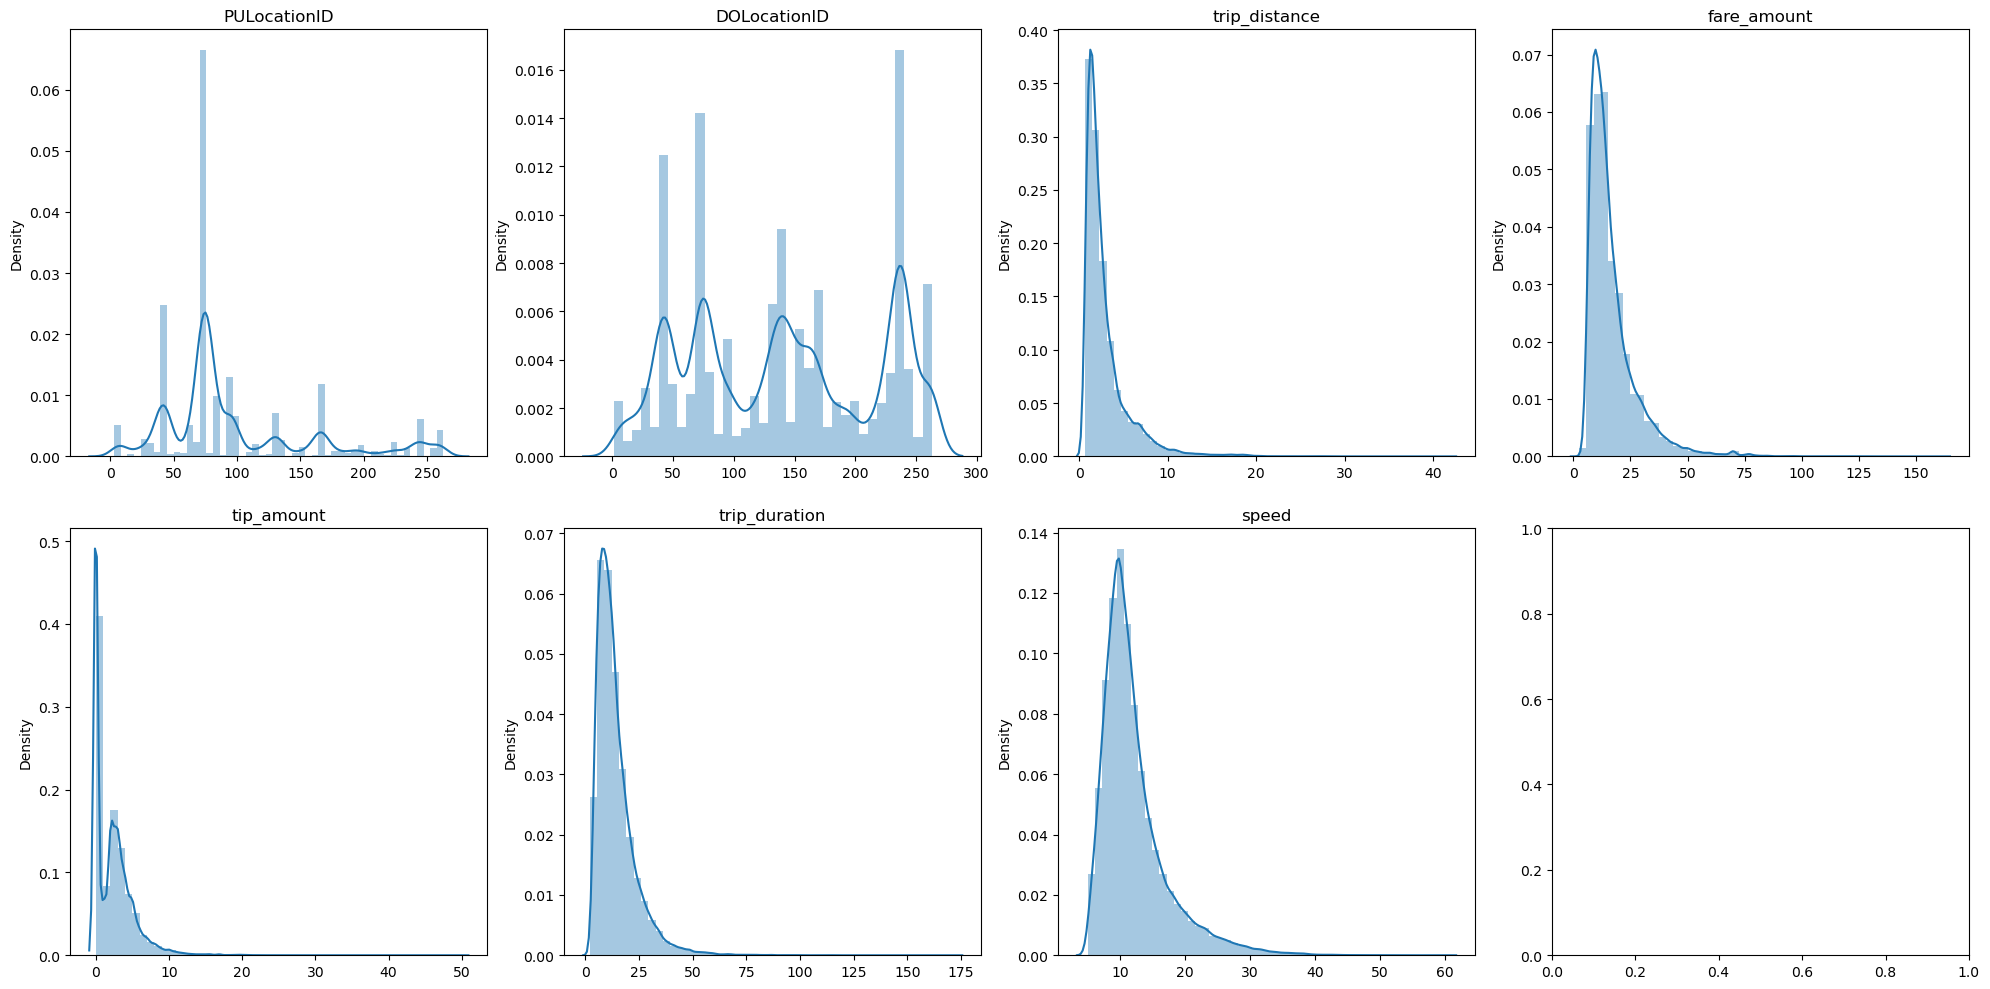

In [6]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    axs[index].set_title(k)
    sns.distplot(x=df[k], ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

`Insight`

- Tidak ada data yang terdistribusi normal

- Pada umumnya distribusi data memiliki distribusi right skew atau positif skew

# Data Analysis

In [7]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

## Demand Based on Time

In [8]:
trip_monthly = df.groupby(df['lpep_pickup_datetime'].dt.date).agg(trip_bydate=('lpep_pickup_datetime', 'count')).reset_index()
trip_monthly['lpep_pickup_datetime'] = pd.to_datetime(trip_monthly['lpep_pickup_datetime'])
trip_monthly['day_of_week'] = trip_monthly['lpep_pickup_datetime'].dt.day_name()

trip_dayly = trip_monthly.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_dayly['day_cat']= trip_dayly['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

trip_dayly_cat = trip_dayly.groupby('day_cat').agg(trip_bycat=('trip_byday', 'sum')).reset_index()

trip_merge = pd.merge(trip_monthly, trip_dayly, on='day_of_week', how='left')
trip_merge = pd.merge(trip_merge, trip_dayly_cat, on='day_cat', how='left')

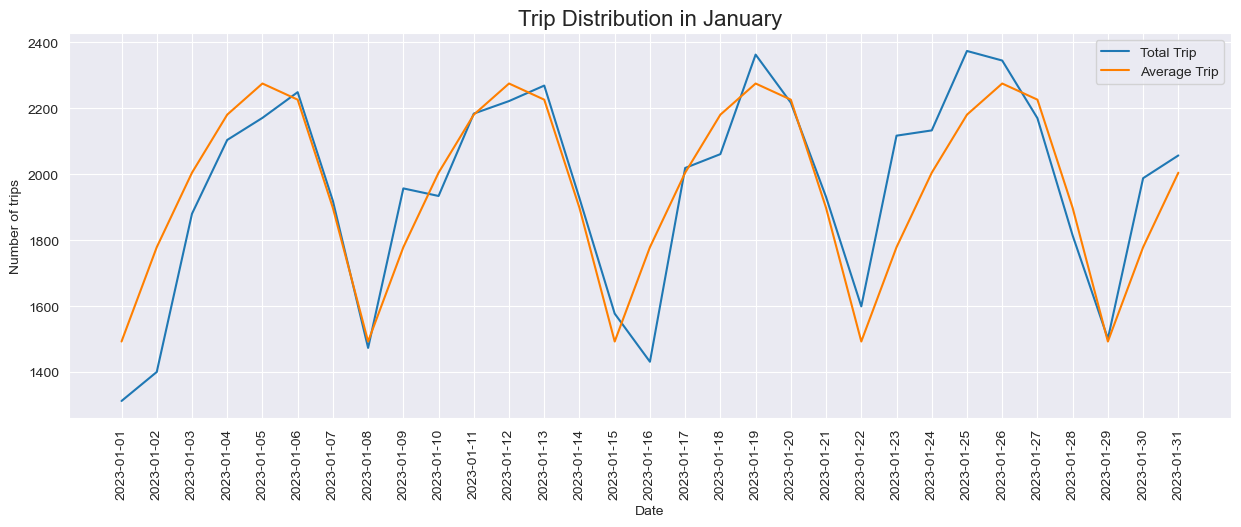

In [9]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='trip_bydate', 
             color=color[1],
             label = 'Total Trip')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='avg_trip',
             color=color[7],
             label = 'Average Trip')

plt.title('Trip Distribution in January', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(trip_monthly['lpep_pickup_datetime'], rotation=90)

plt.show()

`Insights`

- Jumlah perjalanan taksi tertinggi pada bulan januari terjadi pada hari Rabu tanggal 25 Januari 2023.

- Sedangkan jumlah perjalanan taksi terendah pada bulan januari terjadi pada hari Minggu tanggal 01 Januari 2023.

- Terdapat pola yang berulang pada jumlah perjalanan di bulan Januari.

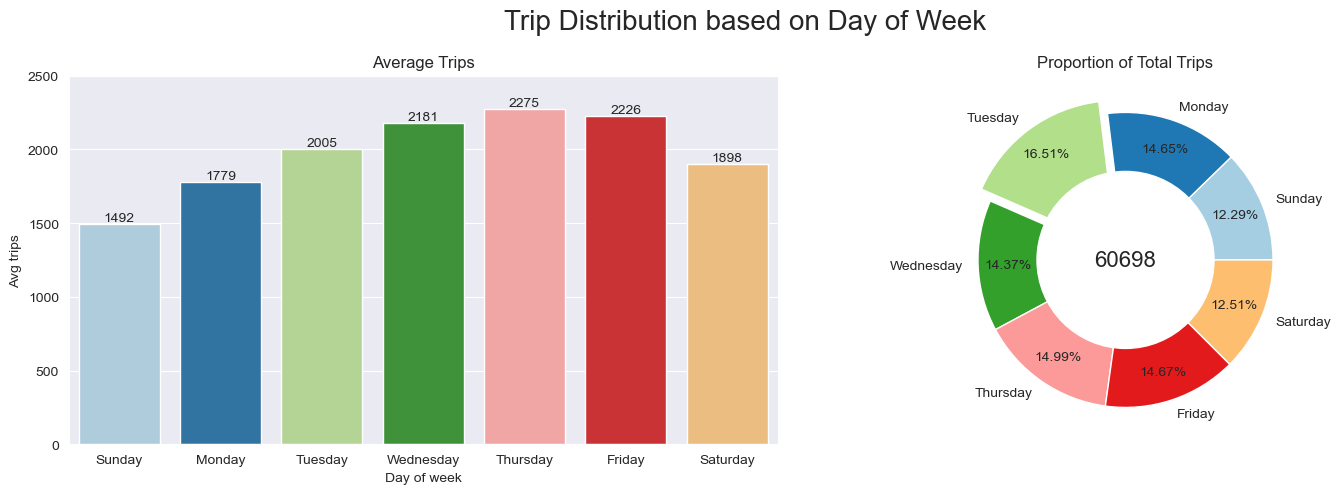

In [10]:
plt.figure(figsize=(15,5))

plt.suptitle('Trip Distribution based on Day of Week', fontsize=20)
plt.subplot(1,2,1)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(), 
                   y=trip_merge['avg_trip'].unique().tolist(), 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 20
    label = "{:.0f}".format(trip_merge['avg_trip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Trips')
plt.xlabel('Day of week')
plt.ylabel('Avg trips')
plt.yticks(np.arange(0, 2501, 500))

plt.subplot(1,2,2)
plt.pie(x=trip_merge['trip_byday'].unique().tolist(), 
        labels=trip_merge['day_of_week'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0.1,0,0,0,0), 
        colors=color)
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, trip_merge['trip_byday'].unique().sum(), ha='center', va='center', fontsize=16)
plt.title('Proportion of Total Trips')

plt.tight_layout()
plt.show()

`Insights`

- Proporsi tertinggi total trip selama bulan januari yaitu hari Rabu sebesar 16% dari total banyaknya perjalanan

- Meski demikian, berdasarkan rata-rata banyaknya perjalanan perhari, perjalanan perhari tertinggi terjadi pada hari kamis mencapai 2275 perjalanan perhari

- Ketika memasuki hari-hari weekdays jumlah perjalanan secara konsisten naik

- Namun ketika memasuki hari weekend jumlah perjalanan perhari menurun cukup signifikan

In [11]:
trip_hourly = df.groupby([df['lpep_pickup_datetime'].dt.hour, 'pickup_time']).agg(trip_byhour=('lpep_pickup_datetime', 'count')).reset_index()
trip_bytimecat = df.groupby('pickup_time').agg(trip_bytime=('pickup_time', 'count')).reset_index()
trip_time_merge = pd.merge(trip_hourly, trip_bytimecat, on='pickup_time', how='left')

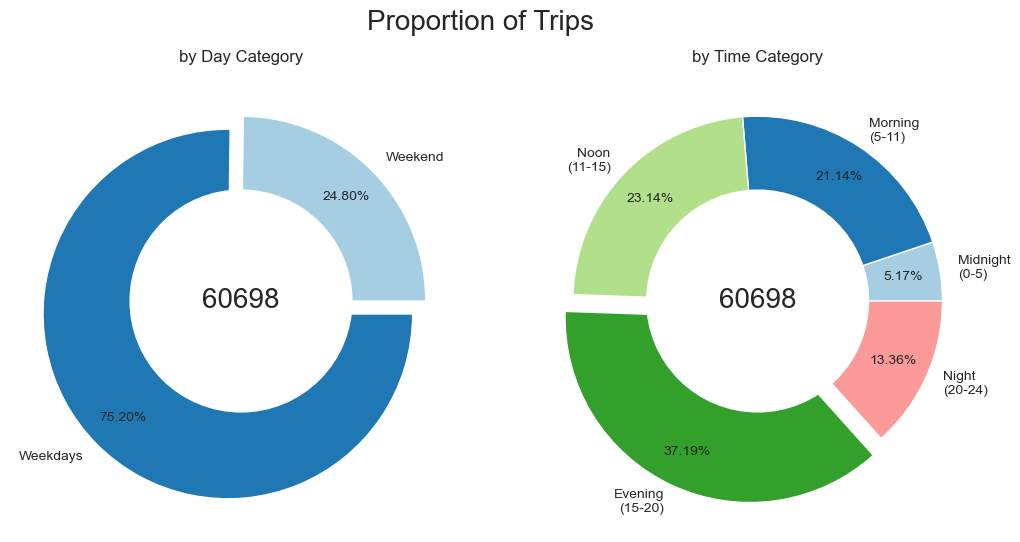

In [12]:
plt.figure(figsize=(15,6))
plt.suptitle('Proportion of Trips', fontsize=20)

plt.subplot(1,2,1)

plt.pie(x=trip_merge['trip_bycat'].unique().tolist(), 
        labels=trip_merge['day_cat'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0.1), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, trip_merge['trip_bydate'].sum(), ha='center', va='center', fontsize=20)
plt.title('by Day Category')

plt.subplot(1,2,2)

labels = [f"{trip_time_merge['pickup_time'].unique().tolist()[0]}\n(0-5)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[1]}\n(5-11)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[2]}\n(11-15)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[3]}\n(15-20)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[4]}\n(20-24)"]

plt.pie(x=trip_time_merge['trip_bytime'].unique().tolist(), 
        labels=labels, 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0,0.1,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, trip_time_merge['trip_byhour'].sum(), ha='center', va='center', fontsize=20)
plt.title('by Time Category')

plt.subplots_adjust(wspace=-0.2) 
plt.show()

`Insights`

- Karena jumlah perjalanan pada weekdays yang meningkat dan weekend menurun, akhirnya perbedaan proporsi dan jumlah perjalanan pada hari weekdays dan weekend cukup signifikan.

- Waktu di sore hari merupakan puncak teramai perjalanan taksi hingga mencapai 37% dari total perjalanan pada bulan Januari.

- Sedangkan untuk waktu dengan jumlah perjalanan terendah yaitu pada waktu tengah malam mulai dari pukul 12:00 malam hingga pukul 05:00 pagi dengan jumlah hanya 5% dari total keseluruhan perjalanan pada bulan Januari.

In [13]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cross = pd.crosstab(index=df['lpep_pickup_datetime'].dt.day_name(), columns=df['lpep_pickup_datetime'].dt.hour, margins=True).reindex(day_order)
cross.columns.name = None
cross.index.name = 'Day of Week'

melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day of Week', var_name='hour', value_name='trips')
cross

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,281,264,221,181,137,74,59,96,123,217,324,425,475,490,503,562,539,507,518,442,379,293,193,159,7462
Monday,110,67,49,62,52,51,134,375,418,482,484,508,525,565,580,695,704,704,724,552,378,305,218,151,8893
Tuesday,85,50,44,35,21,51,186,531,648,647,572,529,548,536,650,722,784,775,796,629,456,323,242,163,10023
Wednesday,84,66,27,25,17,43,165,406,510,518,504,452,430,470,535,651,689,747,733,601,408,279,211,152,8723
Thursday,88,61,41,25,31,51,163,424,505,544,508,496,466,498,589,658,699,760,793,543,444,309,240,165,9101
Friday,135,81,38,36,28,42,140,429,463,469,475,454,413,446,594,695,688,710,718,568,421,321,290,251,8905
Saturday,210,176,122,103,84,45,46,108,196,252,354,434,468,514,454,581,567,510,533,475,419,324,315,301,7591


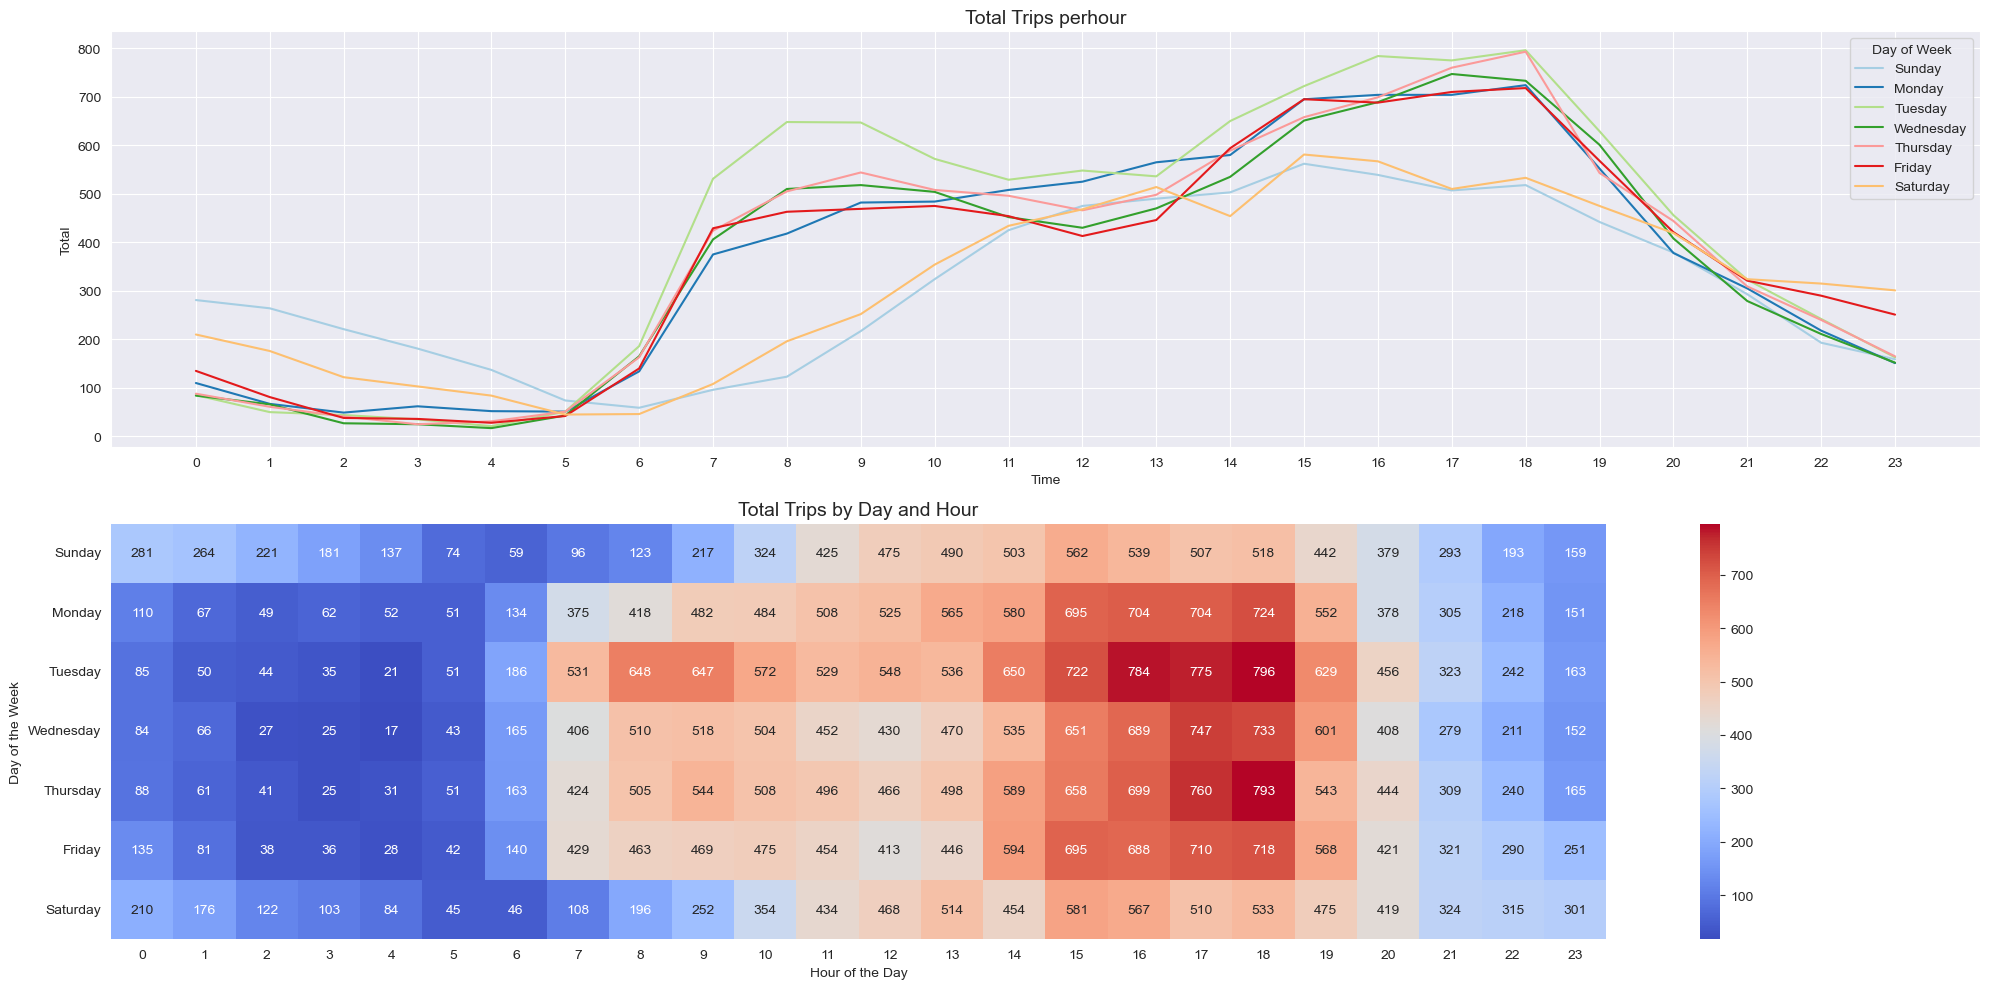

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
sns.lineplot(data=melted_cross, 
             x='hour', 
             y='trips', 
             hue='Day of Week', 
             palette=color)

plt.title('Total Trips perhour', fontsize=14)
plt.xlabel('Time')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Total')

plt.subplot(2, 1, 2)
sns.heatmap(cross.iloc[:,:-1], cmap="coolwarm", annot=True, fmt='d')
plt.title('Total Trips by Day and Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

`Insights`

- Secara Konsisten terjadi peningkatan di pagi hari, di sinag hari cenderung flat, kemudain peningkatan terjadi lagi di sore hari.

- Jam-jam yang ramai terjadi Pada hari Senin hingga hari Jumat pada pukul 15:00 hingga 18:00 dengan jumlah perjalanan mencapai 650 hingga 796 selama bulan Januari. 

- Pada hari Selasa pukul 18:00 merupakan merupakan jumlah perjalanan tertinggi di bulan januari berdasarkan hari dan jam.

- Sedangkan untuk jumlah perjalanan terendahnya terjadi pada hari Rabu pukul 04:00 pagi dengan jumlah 17 perjalanan saja.

In [15]:
agg_borough = df.groupby('PUBorough').agg(count=('PUBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone = df.groupby('PUZone').agg(count=('PUZone', 'count')).sort_values(by='count', ascending=False).reset_index()

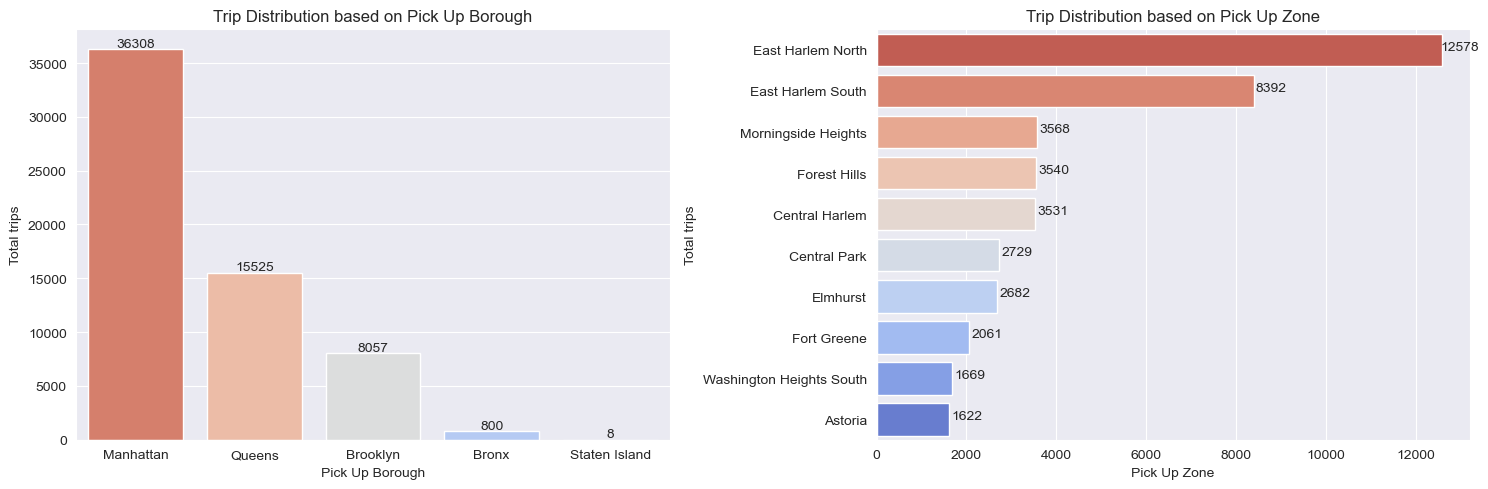

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
bars = sns.barplot(x=agg_borough['PUBorough'], 
                   y=agg_borough['count'], 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=agg_zone.head(10),
                   y='PUZone', 
                   x='count', 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Zone')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')

plt.tight_layout()
plt.show()

`Insights`

- Permintaan tertinggi untuk perjalanan taksi terjadi di wilayah Manhattan sebanyak 36rb perjalanan, yang diikuti Queens sebanyak 15rb, Brooklyn 8rb, dan State Island paling rendah dengan hanya 8 perjalanan saja.

- Sedangkan 10 Zona yang paling tinggi permintaannya diantaranya East Harlem North dengan 12rb, East Harlem South 8rb hingga Astoria 1622 Perjalanan.

In [17]:
agg_ratecode = df.groupby('RatecodeID').agg(count=('RatecodeID', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_ratecode['RatecodeID'] = agg_ratecode['RatecodeID'].apply(lambda x: x if x == 'Standard rate' else 'Other')
agg_ratecode = agg_ratecode.groupby('RatecodeID').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_payment = df.groupby('payment_type').agg(count=('payment_type', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_payment['payment_type'] = agg_payment['payment_type'].apply(lambda x: x if x == 'Credit card' or x == 'Cash' else 'Other')
agg_payment = agg_payment.groupby('payment_type').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_triptype = df.groupby('trip_type').agg(count=('trip_type', 'count')).sort_values(by='count', ascending=False).reset_index()

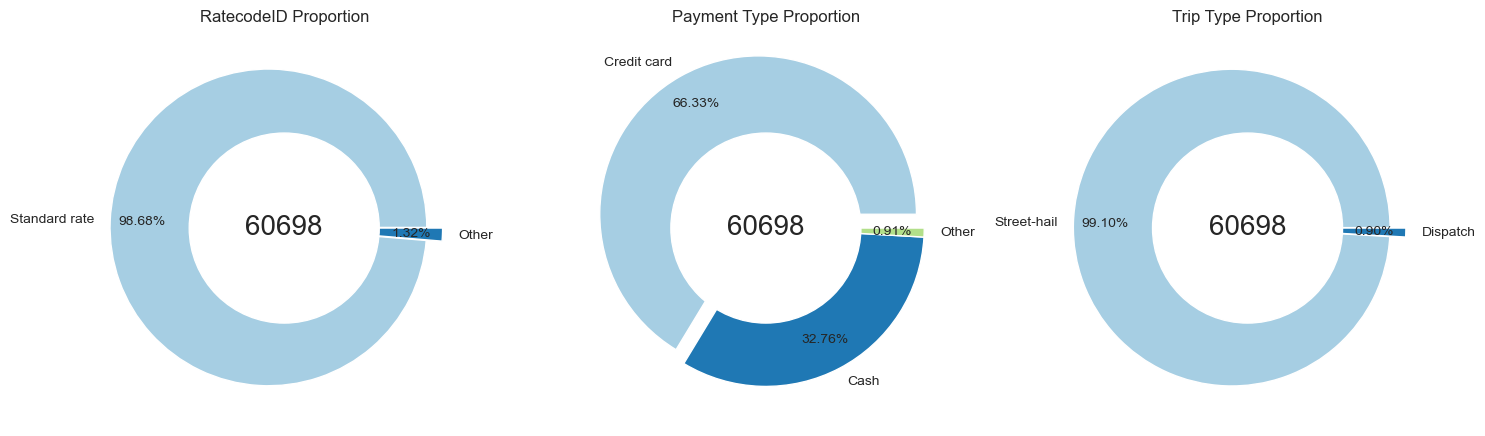

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=agg_ratecode['count'], 
        labels=agg_ratecode['RatecodeID'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('RatecodeID Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,2)
plt.pie(x=agg_payment['count'], 
        labels=agg_payment['payment_type'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Payment Type Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,3)
plt.pie(x=agg_triptype['count'], 
        labels=agg_triptype['trip_type'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Trip Type Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.tight_layout() 
plt.show()

`Insights:`

- Umumnya pelanggan melakukan perjalanan taksi dengan jenis tarif standard rate artinya mayoritas pelanggan menggunakan taksi untuk perjalanan dalam kota dan tipe perjalanan street-hail.

- Tipe pembayaran yang sering digunakan oleh pelanggan yaitu credit card dan cash.

In [19]:
agg_distance = df.groupby('distance_bins').agg(count=('distance_bins', 'count'), median=('trip_distance', 'median')).sort_values(by='count', ascending=False).reset_index()
agg_duration = df.groupby('duration_bins').agg(count=('duration_bins', 'count'), median=('trip_duration', 'median')).sort_values(by='count', ascending=False).reset_index()

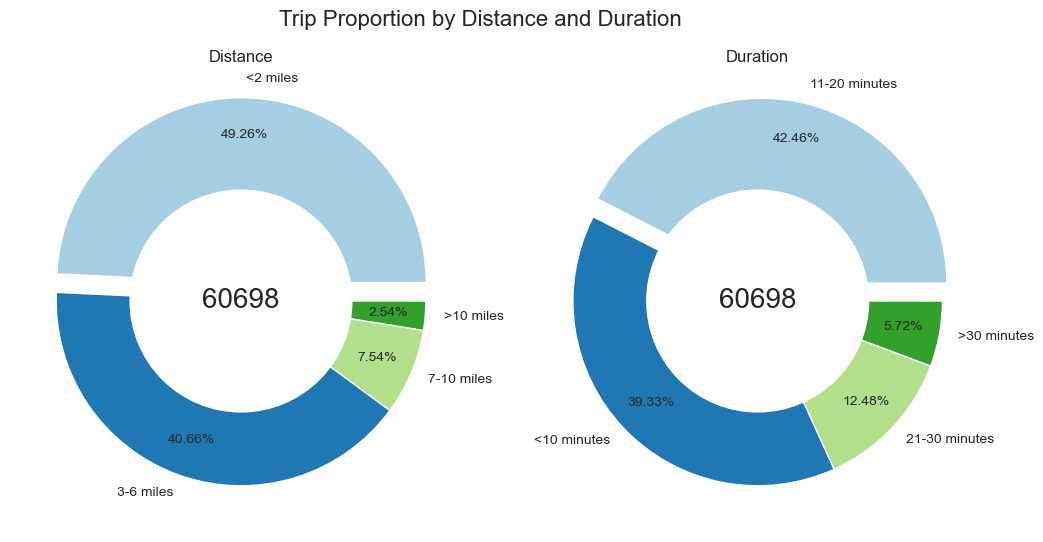

In [20]:
plt.figure(figsize=(15,6))
plt.suptitle('Trip Proportion by Distance and Duration', fontsize=16)
plt.subplot(1,2,1)

plt.pie(x=agg_distance['count'], 
        labels=agg_distance['distance_bins'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Distance')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,2,2)
plt.pie(x=agg_duration['count'].unique().tolist(), 
        labels=agg_duration['duration_bins'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0,0), 
        colors=color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Duration')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplots_adjust(wspace=-0.2) 
plt.show()

`Insights`

- Jarak yang paling sering di tempuh oleh pelanggan yaitu perjalanan memiliki jarak kurang dari 2 mil.

- Sedangkan berdasarkan durasi, 42% dari keseluruhan perjalanan yang sering dilakukan memiliki durasi perjalanan antara 11-20 menit.

## Amount Distribution

In [21]:
import plotly.express as px

puzone_amount = df.groupby(['DOBorough', 'DOZone']).agg(trip_count=('fare_amount', 'count'), 
                                                        total_fare_amount=('fare_amount', 'sum'),
                                                        avg_fare_amount=('fare_amount', 'mean'),
                                                        median_fare_amount=('fare_amount', 'median')
                                                        ).sort_values(by='total_fare_amount', ascending=False).reset_index().round(2)

fig = px.treemap(puzone_amount, 
                 path=[px.Constant("All"), 'DOBorough', 'DOZone'], 
                 values='total_fare_amount', 
                 color='median_fare_amount',
                 color_continuous_scale='RdBu_r',
                 range_color=[5, 40],
                 custom_data=['trip_count', 'median_fare_amount'],
                 title='Heatmap for Average fare amount based on Drop off Location')
fig.update_traces(hovertemplate='<b>%{label}</b><br>Total Fare: %{value}<br>Trip Count: %{customdata[0]}<br>Median Fare: %{customdata[1]:.2f}')
fig.update_layout(margin = dict(t=50, l=0, r=0, b=0))
fig.update_traces(marker=dict(cornerradius=2))
fig.show()

In [22]:
trip_amount_dist = df.groupby(['PUZone', 'DOZone']).agg(trip_count=('PUZone', 'count'),
                                                        total_fare=('fare_amount', 'sum'), 
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'), 
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)
route = trip_amount_dist['PUZone'] + " - " + trip_amount_dist['DOZone']
trip_amount_dist.insert(0, 'Route', route)
trip_amount_dist.drop(columns=['PUZone', 'DOZone'], inplace=True)

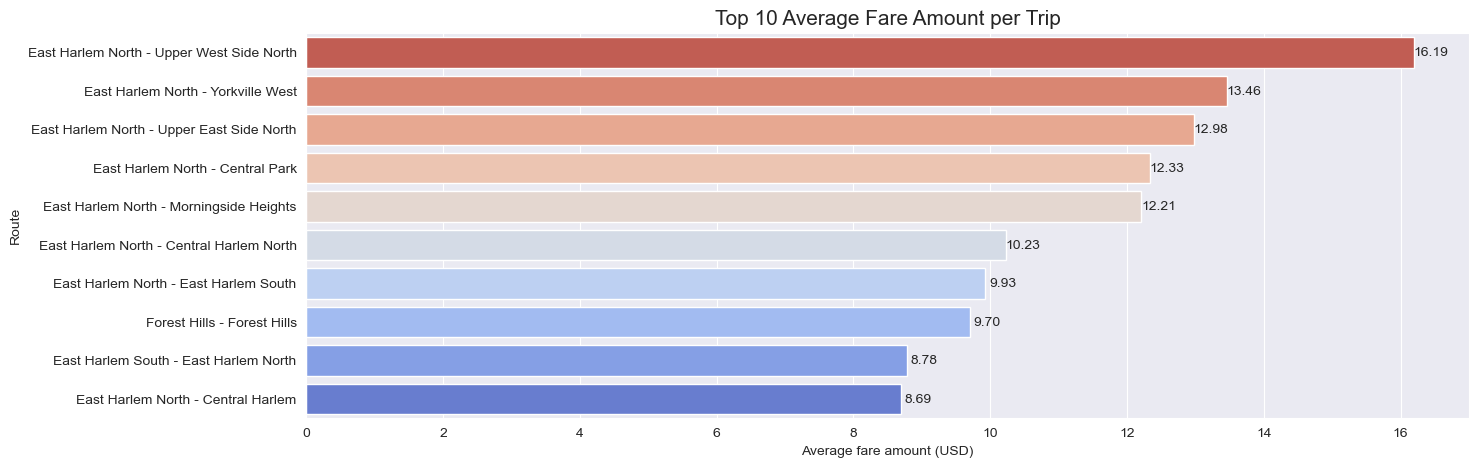

In [23]:
plt.figure(figsize=(15,5))
data = trip_amount_dist.sort_values(by='avg_fare', ascending=False)
bars = sns.barplot(data=data,
                   y='Route', 
                   x='avg_fare', 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{:.2f}".format(data['avg_fare'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.xlabel('Average fare amount (USD)')
plt.ylabel('Route')
plt.title('Top 10 Average Fare Amount per Trip', fontsize=15)

plt.show()

`Insight:`

- Top 10 rute yang memiliki rata-rata fare amount tertinggi berdasarkan volume perjalanan tertinggi diantaranya:

    East Harlem North - Upper West Side North dengan 16 USD, 
    
    East Harlem North - Upper Yorkville West dengan 13 USD, 
    
    East Harlem North - Upper East Side North dengan 12 USD, 
    
    hingga terakhir East Harlem North - Central Harlem dengan 8 USD

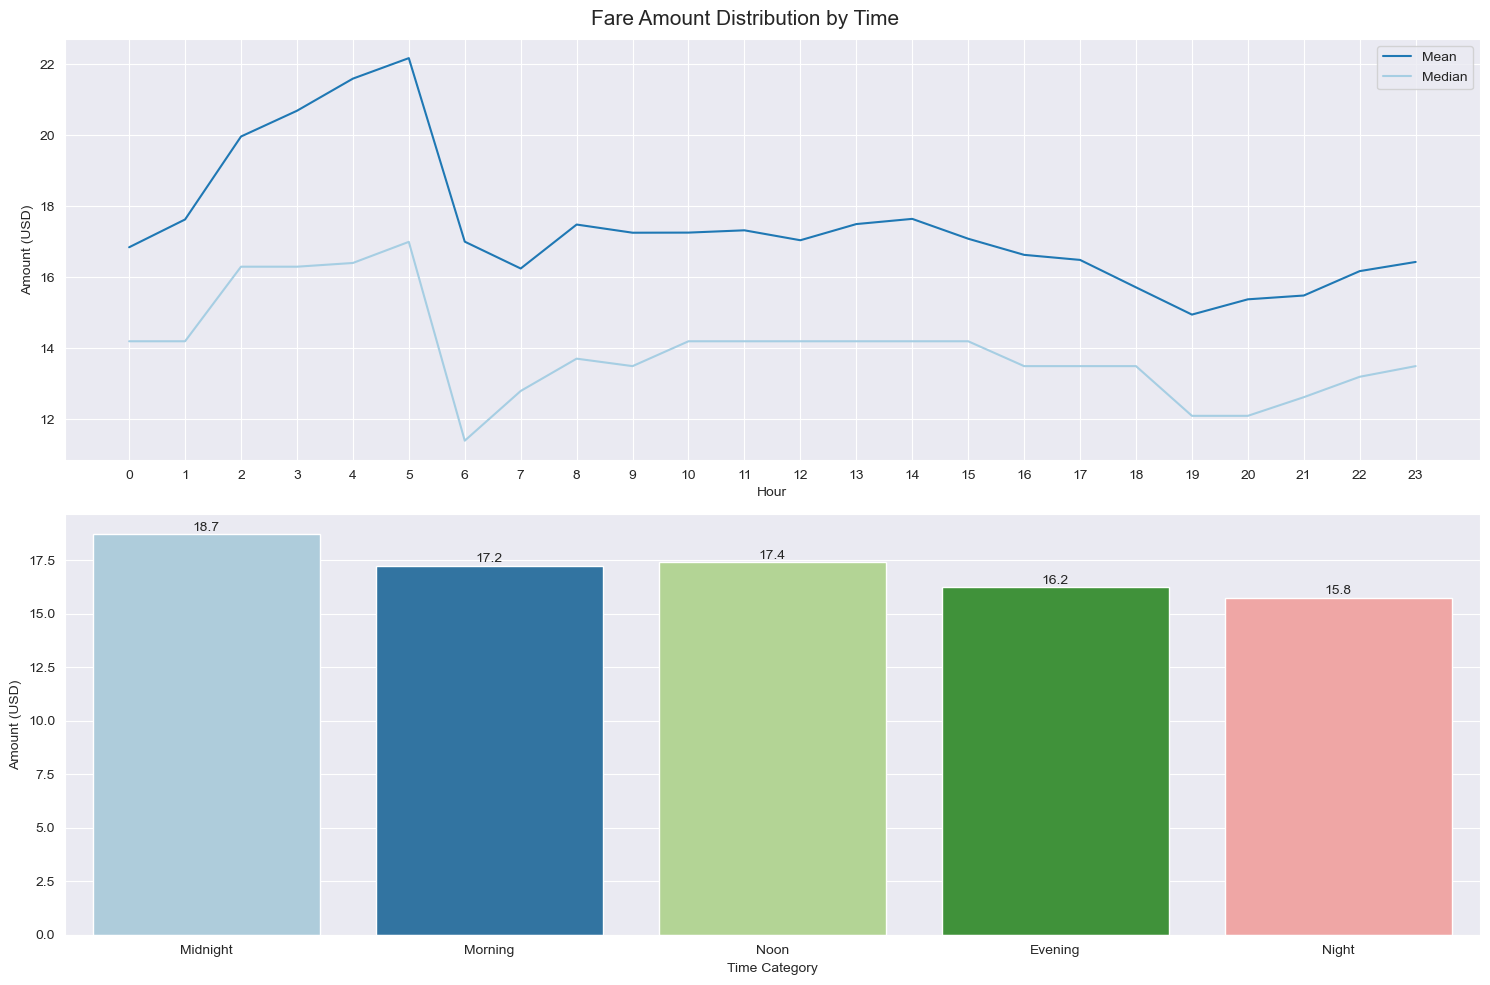

In [24]:
sort_time = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
amount_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour).agg(total_fare_amount=('fare_amount', 'sum'), 
                                                                    avg_fare_amount=('fare_amount', 'mean'), 
                                                                    median_fare_amount=('fare_amount', 'median')).reset_index()
amount_by_time = df.groupby('pickup_time').agg(total_fare_amount=('fare_amount', 'sum'), 
                                               avg_fare_amount=('fare_amount', 'mean'), 
                                               median_fare_amount=('fare_amount', 'median')).reindex(sort_time).reset_index().round(2)

plt.figure(figsize=(15,10))
plt.suptitle('Fare Amount Distribution by Time', fontsize=15)

plt.subplot(2,1,1)
sns.lineplot(data=amount_by_hour, 
             x='lpep_pickup_datetime', 
             y='avg_fare_amount', 
             color=color[1],
             label = 'Mean')
sns.lineplot(data=amount_by_hour, 
             x='lpep_pickup_datetime', 
             y='median_fare_amount', 
             color=color[0],
             label = 'Median')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Amount (USD)')


plt.subplot(2,1,2)
bars = sns.barplot(data=amount_by_time,
                   x='pickup_time', 
                   y='avg_fare_amount',
                   palette=color)

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.3
    label = "{:.1f}".format(amount_by_time['avg_fare_amount'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center', va='center')
plt.xlabel('Time Category')
plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

`Insight:`

- Harga rata-rata dalam sekali perjalanan di tengah malam yaitu pukul 00:00 - 05:00 relatif lebih mahal di bandingnya yang lainnya yaitu 19 USD.

- Harga rata-rata dalam sekali perjalanan terendah yaitu di malam hari pada pukul 20:00 - 00.00 dengan fare amount rata-rata 15 USD.

- Sementara di waktu yang lainnya seperti pagi, siang, dan sore relatif sama.

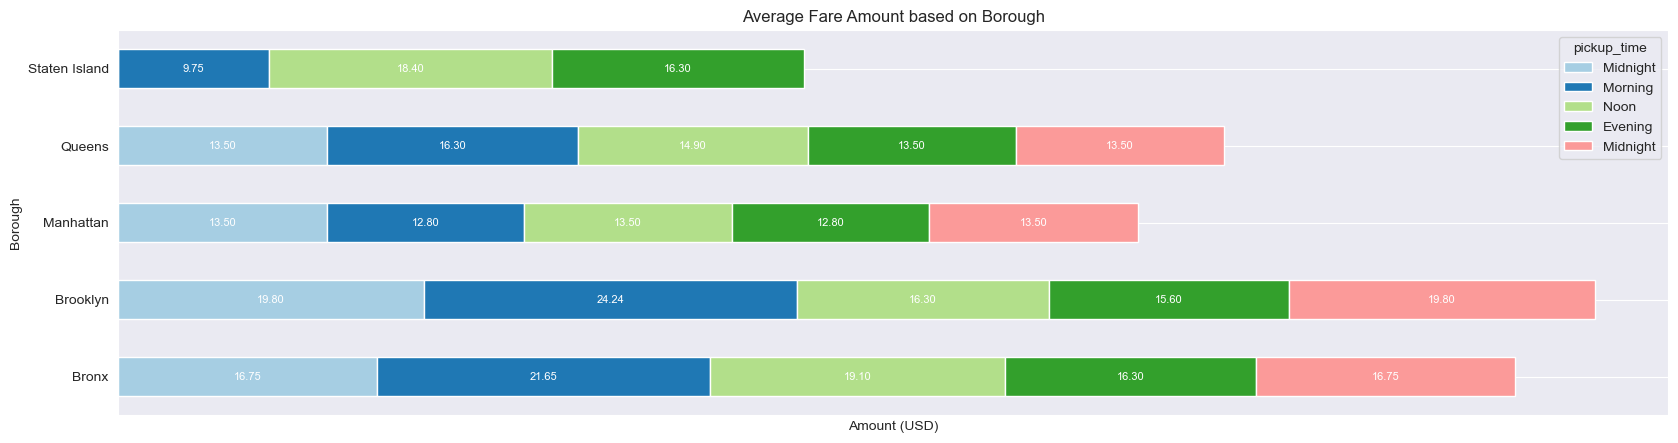

In [25]:
borough_amount_stack = df.pivot_table(index='PUBorough', columns='pickup_time', values='fare_amount', aggfunc='median').fillna(0)
borough_amount_stack = borough_amount_stack[['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']]
borough_tip = df.groupby(['PUBorough', 'pickup_time']).agg(median_tip=('tip_amount', 'median')).sort_values(by='median_tip', ascending=False).reset_index().round(2)

ax = borough_amount_stack.plot(kind='barh', stacked=True, color=color, figsize=(20,5))
plt.title('Average Fare Amount based on Borough')
plt.xlabel('Amount (USD)')
plt.ylabel('Borough')
plt.xticks([])
for idx, rect in enumerate(ax.patches):
    width = rect.get_width()
    if width > 0:
        y = rect.get_y() + rect.get_height() / 2
        cum_width_prev_segments = sum(borough_amount_stack.iloc[idx % len(borough_amount_stack), :idx // len(borough_amount_stack)])
        x = cum_width_prev_segments + width / 2
        plt.text(x, y, f"{width:.2f}", ha='center', va='center', color='white', fontsize=8)

plt.show()

`Insight:`

- Rata-rata fare amount dalam sekali perjalanan di wilayah Brooklyn pada pagi hari relatif lebih mahal di banding yang lainnya.

- Rata-rata fare amount terendahnya terdapat di Staten Island pada pagi hari.

- Tidak ada trip di Staten Island pada malam hari sampai tengah malam.

- Fare amount di setiap wilayah cenderung memiliki pola yang sama yaitu mengalami kenaikan di pagi hari kemudian penurunan mulai di siang hari gingga tengah malam kecuali wilayah Manhattan.

- Rata-rata fare amount di wilayah Manhattan cenderung memiliki harga yang sama mulai dari tengah malam maupun pagi, siang, sore, atau di malam hari.

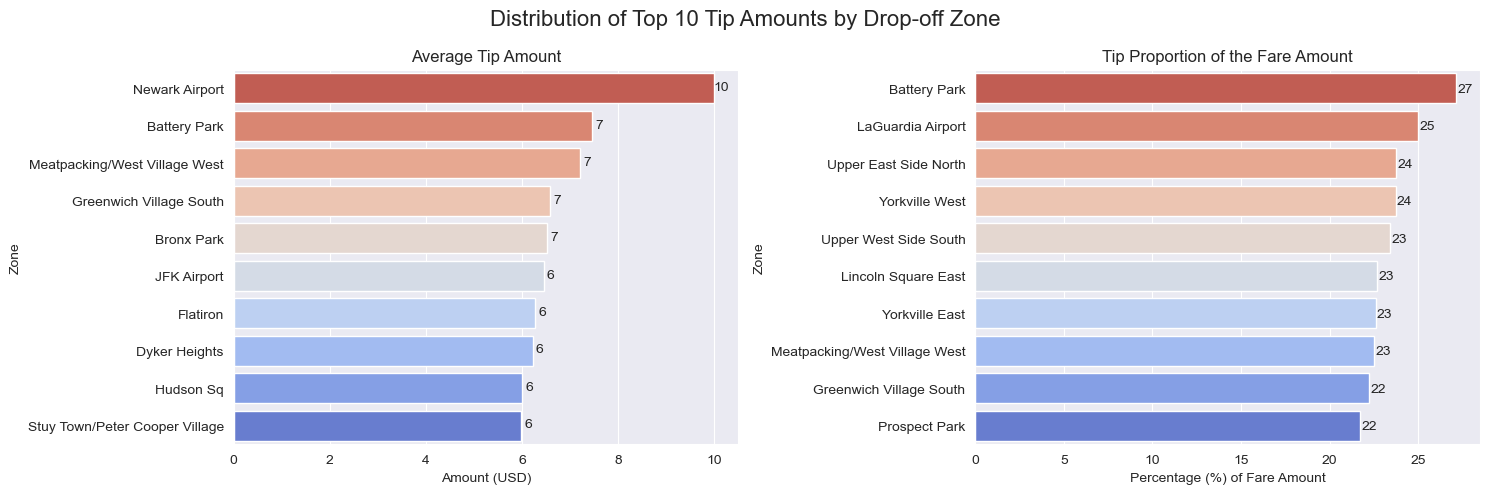

In [26]:
doloc_tip = df.groupby('DOZone').agg(count=('tip_amount', 'count'), 
                                     total_tip=('tip_amount', 'sum'), 
                                     median_tip=('tip_amount', 'median'), 
                                     median_fare=('fare_amount', 'median')).reset_index()
doloc_tip['proportion_of_tip'] = (doloc_tip['median_tip']/doloc_tip['median_fare']*100).round(2)

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Top 10 Tip Amounts by Drop-off Zone', fontsize=16)

plt.subplot(1,2,1)
data = doloc_tip[doloc_tip['count']>1].sort_values(by='median_tip', ascending=False).head(10).reset_index()
bars= sns.barplot(data=data,
            x='median_tip',
            y='DOZone', 
            palette=scale)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2 + 0.05
    x_value = bar.get_width() + 0.15
    label = "{:.0f}".format(data['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Tip Amount')
plt.xlabel('Amount (USD)')
plt.ylabel('Zone')

plt.subplot(1,2,2)
data = doloc_tip[doloc_tip['count']>1].sort_values(by='proportion_of_tip', ascending=False).head(10).reset_index()
bars = sns.barplot(data=data,
            x='proportion_of_tip',
            y='DOZone', 
            palette=scale)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.5
    label = "{:.0f}".format(data['proportion_of_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Tip Proportion of the Fare Amount')
plt.xlabel('Percentage (%) of Fare Amount')
plt.ylabel('Zone')

plt.tight_layout()
plt.show()

`Insight:`

- Top 10 rata-rata tip tertinggi yang diberikan penumpang berdasarkan besarnya tip yaitu mulai dari 6-10 USD dengan zona drop off Newark Airport yang memiliki hingga yang terakhir Stuy Town/Peter Cooper Village.

- Top 10 rata-rata tip tertinggi yang diberikan penumpang berdasarkan proporsi dari fare amount yaitu mulai dari 22-27% dari fare_amount dengan zona drop off Battery Park yang paling tinggi dan Prospect Park yang paling rendah.

## Tip Amount Correlation

In [27]:
df_tip_corr = df[['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration', 'speed', 'fare_amount', 'tip_amount']][df['tip_amount']>0]
df_tip_corr.head()

,PULocationID,DOLocationID,trip_distance,trip_duration,speed,fare_amount,tip_amount
0,166,143,2.58,11.02,14.05,14.9,4.03
1,24,43,1.81,6.77,16.04,10.7,2.64
2,41,238,1.30,5.82,13.40,6.5,1.70
5,181,45,3.80,17.42,13.09,19.1,4.85
7,41,166,1.11,4.95,13.45,7.2,1.00


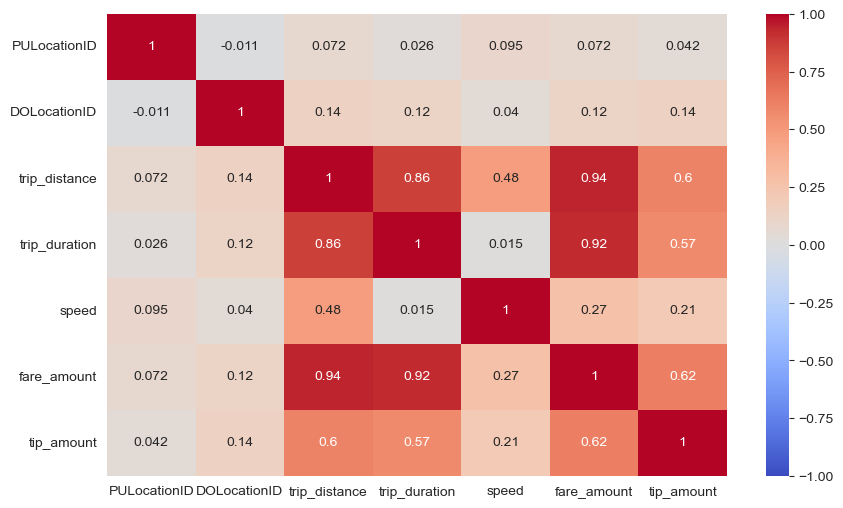

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df_tip_corr.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

`Insights: `

- `trip_distance dengan tip_amount (0.6)`:

    Terdapat korelasi positif yang moderat antara jarak perjalanan dengan jumlah tip. Artinya, semakin jauh jarak perjalanan, cenderung semakin besar tip yang diberikan oleh pelanggan.

- `trip_duration dengan tip_amount (0.57)`:

    Terdapat korelasi positif yang moderat antara durasi perjalanan dengan jumlah tip. Ini menunjukkan bahwa perjalanan yang berlangsung lebih lama cenderung mendapatkan tip yang lebih besar, meskipun kekuatan korelasinya sedikit lebih lemah dibandingkan dengan trip_distance.

- `driving_speed dengan tip_amount (0.21)`:

    Korelasi antara kecepatan berkendara dengan jumlah tip adalah positif tetapi lemah. Artinya, kecepatan pengemudi mempengaruhi besarnya tip, tetapi tidak sekuat variabel lainnya. Dapat diinterpretasikan bahwa kecepatan berkendara mungkin bukan faktor utama yang mempengaruhi keputusan pelanggan dalam memberikan tip.

- `fare_amount dengan tip_amount (0.62)`:

    Ada korelasi positif yang moderat hingga kuat antara jumlah tarif dengan tip. Ini adalah korelasi terkuat di antara variabel-variabel lainnya, yang menunjukkan bahwa semakin besar tarif yang dikenakan, semakin besar kemungkinan tip yang diberikan oleh pelanggan.

Dalam kesimpulan, berdasarkan korelasi di atas, kita dapat mengatakan bahwa fare_amount dan trip_distance adalah dua faktor utama yang mempengaruhi besarnya tip, dengan fare_amount sedikit lebih dominan. Ini masuk akal, mengingat pelanggan mungkin cenderung memberikan tip berdasarkan persentase dari total tarif atau berdasarkan seberapa jauh mereka telah diberikan tumpangan.

## Significance of Tip Amount to Other Features

### Weekdays or Weekend

In [29]:
daycat_tip_corr = df[df['tip_amount']>0][['day_category', 'tip_amount']]
ct_tip_daycat = daycat_tip_corr.groupby('day_category').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_daycat

,day_category,count,avg_tip,median_tip
0,Weekdays,27796,3.69,3.05
1,Weekend,9219,3.76,3.10


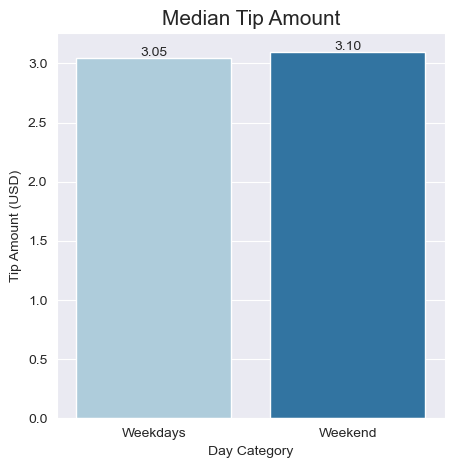

In [30]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=ct_tip_daycat, x='day_category', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.01
    label = "{:.2f}".format(ct_tip_daycat['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Day Category')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis**:

**Ho**: Median tip pada hari weekend = Median tip pada hari weekdays

**Ha**: Median tip pada hari weekend <> Median tip pada hari weekdays

In [31]:
from scipy.stats import mannwhitneyu

stat, pvalue= mannwhitneyu(
    daycat_tip_corr[daycat_tip_corr['day_category'] == 'Weekend']['tip_amount'].sample(100, random_state=0),
    daycat_tip_corr[daycat_tip_corr['day_category'] == 'Weekdays']['tip_amount'].sample(100, random_state=0),
    alternative='two-sided'
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.2989890032998106
Terima H0


**Conclusion**: 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, data memberikan bukti bahwa median dari `nilai tip pada hari weekend lebih sama dengan meidan dari tip pada hari weekdays`.

### Pickup Time

In [32]:
putime_tip_corr = df[df['tip_amount']>0][['pickup_time', 'tip_amount']]
ct_tip_putime = putime_tip_corr.groupby('pickup_time').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_putime

,pickup_time,count,avg_tip,median_tip
0,Evening,14100,3.69,3.20
1,Midnight,1689,4.09,3.24
2,Morning,8044,3.63,2.88
3,Night,5135,3.56,3.00
4,Noon,8047,3.81,3.14


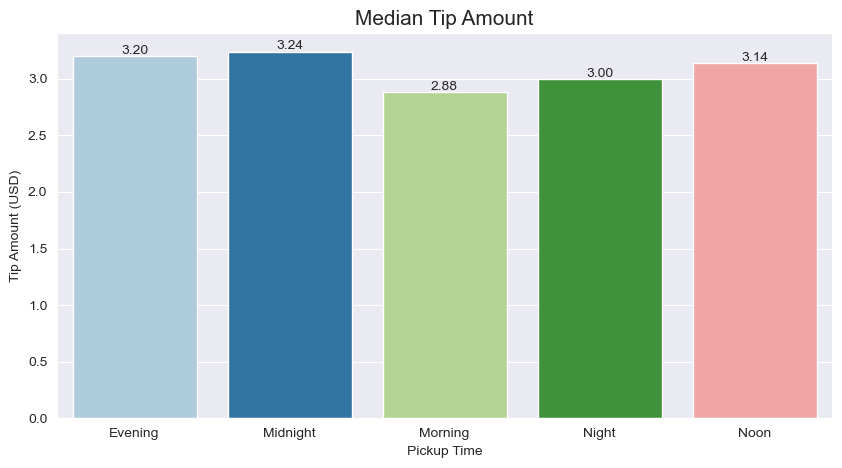

In [33]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_putime, x='pickup_time', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.02
    label = "{:.2f}".format(ct_tip_putime['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
    
plt.xlabel('Pickup Time')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis:**

**Ho**: Median Tip Dengan Pada Kategori Waktu Midnight = Morning = Noon = Evening = Night

**Ha**: Setidaknya ada satu pasang yang tidak sama (dan kita tidak tahu yang mana)

In [34]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Midnight']['tip_amount'].sample(100, random_state=0),
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Morning']['tip_amount'].sample(100, random_state=0),
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Noon']['tip_amount'].sample(100, random_state=0),
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Evening']['tip_amount'].sample(100, random_state=0),
    putime_tip_corr[putime_tip_corr['pickup_time'] == 'Night']['tip_amount'].sample(100, random_state=0),
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.41009687386731164
Terima H0


**Conclusion:** 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, tidak ada perbedaan signifikan dalam `tip_amount` antara setidaknya dua dari kategori waktu pickup. Dengan kata lain, `waktu pickup tidak mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan`.

### Trip Types

In [35]:
trip_type_tip_corr = df[df['tip_amount']>0][['trip_type', 'tip_amount']]
ct_tip_trip_type= trip_type_tip_corr.groupby('trip_type').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_trip_type

,trip_type,count,avg_tip,median_tip
0,Dispatch,237,6.95,5.00
1,Street-hail,36778,3.68,3.05


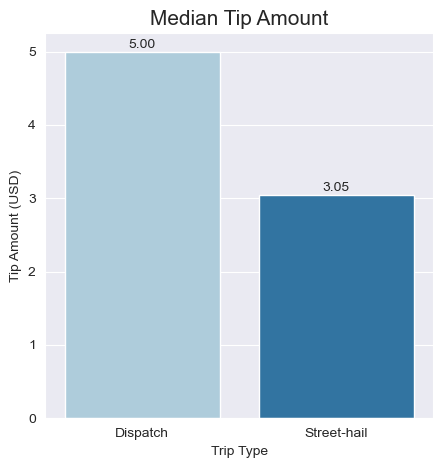

In [36]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=ct_tip_trip_type, x='trip_type', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.05
    label = "{:.2f}".format(ct_tip_trip_type['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Trip Type')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)

plt.show()

**Hypothesis**:

**Ho**: Median tip pada tipe perjalanan street-hail = Median tip pada tipe perjalanan melalui aplikasi

**Ha**: Median tip pada tipe perjalanan street-hail > Median tip pada tipe perjalanan melalui aplikasi

In [37]:
from scipy.stats import mannwhitneyu

stat, pvalue= mannwhitneyu(
    trip_type_tip_corr[trip_type_tip_corr['trip_type'] == 'Street-hail']['tip_amount'].sample(100, random_state=0),
    trip_type_tip_corr[trip_type_tip_corr['trip_type'] == 'Dispatch']['tip_amount'].sample(100, random_state=0),
    alternative='less'
)

print('p-Value', pvalue/2)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 3.7971370699720352e-06
Tolak H0


**Conclusion**: 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, data memberikan bukti bahwa median dari `nilai tip tipe perjalanan street-hail lebih kecil dari pada tip pada tipe perjalanan melalui aplikasi`.

### RateCodeID

In [38]:
ratecode_tip_corr = df[df['tip_amount']>0][['RatecodeID', 'tip_amount']]
ct_tip_ratecode= ratecode_tip_corr.groupby('RatecodeID').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_ratecode

,RatecodeID,count,avg_tip,median_tip
0,JFK Airport,124,15.18,15.61
1,Negotiated fare,279,6.47,4.80
2,Newark Airport,7,20.09,21.99
3,Standard rate,36605,3.64,3.05


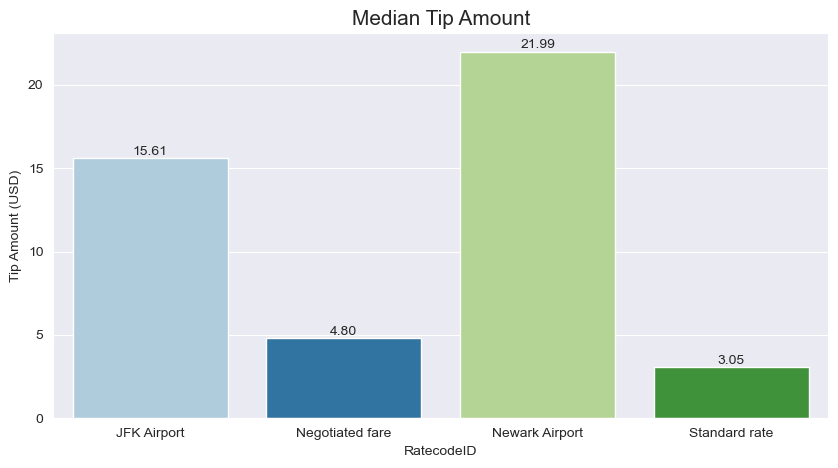

In [39]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_ratecode, x='RatecodeID', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.2
    label = "{:.2f}".format(ct_tip_ratecode['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('RatecodeID')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis:**

**Ho**: Median Tip Dengan Ratecode Standard Rate = JFK Airport = Newark Airport = Nassau or Westchester = Negotiated fare

**Ha**: Setidaknya ada satu pasang yang tidak sama (dan kita tidak tahu yang mana)

In [40]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Standard rate']['tip_amount'].sample(7, random_state=0),
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'JFK Airport']['tip_amount'].sample(7, random_state=0),
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Newark Airport']['tip_amount'].sample(7, random_state=0),
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Negotiated fare']['tip_amount'].sample(7, random_state=0),
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.0014288307359390058
Tolak H0


**Conclusion:** 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam `tip_amount` antara setidaknya dua dari kategori dari jenis tarif. Dengan kata lain, `jenis tarif mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan`.

### Trip Distance

In [41]:
tip_distance = df[df['tip_amount']>0][['tip_amount', 'distance_bins']]
ct_tip_distance = tip_distance.groupby('distance_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).reset_index().round(2)
ct_tip_distance

,distance_bins,count,avg_tip,median_tip
0,3-6 miles,15731,4.06,4.00
1,7-10 miles,2920,6.84,7.14
2,<2 miles,17419,2.49,2.44
3,>10 miles,945,10.62,10.55


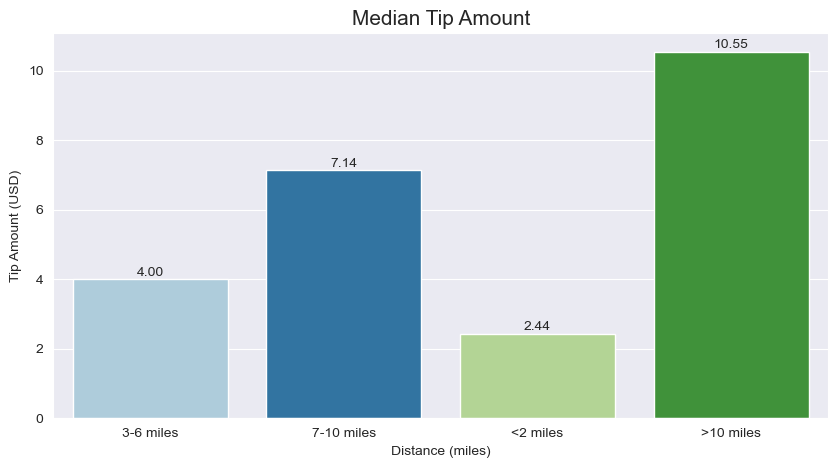

In [42]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_distance, x='distance_bins', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.1
    label = "{:.2f}".format(ct_tip_distance['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis**:

**Ho**: Median tip pada trip yang memiliki jarak <2 mile = 3-6 miles = 7-10 miles = >10 miles

**Ha**: Median tip salah satu jarak memiliki nilai yang tidak sama secara signifikan

In [43]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_distance[tip_distance['distance_bins'] == '<2 miles']['tip_amount'].sample(100, random_state=0),
    tip_distance[tip_distance['distance_bins'] == '3-6 miles']['tip_amount'].sample(100, random_state=0),
    tip_distance[tip_distance['distance_bins'] == '7-10 miles']['tip_amount'].sample(100, random_state=0),
    tip_distance[tip_distance['distance_bins'] == '>10 miles']['tip_amount'].sample(100, random_state=0)
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 1.6599197209973676e-36
Tolak H0


**Conclusion**: 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam `tip_amount` antara setidaknya dua dari kategori jarak. Dengan kata lain, `Jarak perjalanan mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan`.

### Trip Duration

In [44]:
tip_duration = df[df['tip_amount']>0][['tip_amount', 'duration_bins']]
ct_tip_duration = tip_duration.groupby('duration_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_duration

,duration_bins,count,avg_tip,median_tip
0,11-20 minutes,16205,3.71,3.56
1,21-30 minutes,4876,5.56,5.37
2,<10 minutes,13931,2.40,2.34
3,>30 minutes,2003,8.24,7.80


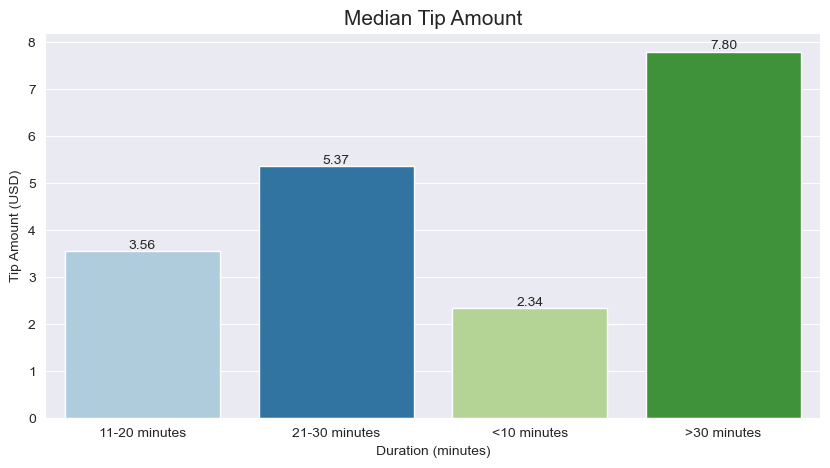

In [45]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_duration, x='duration_bins', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.05
    label = "{:.2f}".format(ct_tip_duration['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Duration (minutes)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis**:

**Ho**: Median tip pada trip yang memiliki durasi perjalanan <10 menit = 11-20 menit = 21-30 menit = >30 menit

**Ha**: Median tip salah satu kelompok durasi memiliki nilai yang berbeda secara signifikan

In [46]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_duration[tip_duration['duration_bins'] == '<10 minutes']['tip_amount'].sample(100, random_state=0),
    tip_duration[tip_duration['duration_bins'] == '11-20 minutes']['tip_amount'].sample(100, random_state=0),
    tip_duration[tip_duration['duration_bins'] == '21-30 minutes']['tip_amount'].sample(100, random_state=0),
    tip_duration[tip_duration['duration_bins'] == '>30 minutes']['tip_amount'].sample(100, random_state=0)
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 2.835715464363157e-37
Tolak H0


**Conclusion**: 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam `tip_amount` antara setidaknya dua dari kategori durasi. Dengan kata lain, `Durasi perjalanan mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan`.

### Driving Speed

In [47]:
tip_speed = df[df['tip_amount']>0][['tip_amount', 'speed_bins']]
ct_tip_speed = tip_speed.groupby('speed_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_speed

,speed_bins,count,avg_tip,median_tip
0,11-20 mph,19412,3.68,3.06
1,21-30 mph,2630,5.98,5.24
2,<10 mph,14537,3.19,2.94
3,>30 mph,436,8.51,8.07


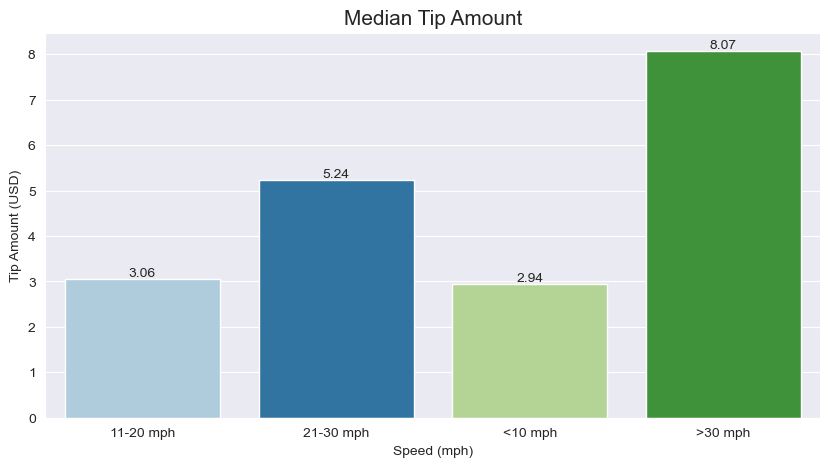

In [48]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_speed, x='speed_bins', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.05
    label = "{:.2f}".format(ct_tip_speed['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Speed (mph)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis**:

**Ho**: Median tip pada trip yang kecepatannya <10 mil = 11-20 mil = 21-30 mil = >30 mil

**Ha**: Median tip salah satu kelompok durasi memiliki nilai yang berbeda secara signifikan

In [49]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_speed[tip_speed['speed_bins'] == '<10 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed[tip_speed['speed_bins'] == '11-20 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed[tip_speed['speed_bins'] == '21-30 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed[tip_speed['speed_bins'] == '>30 mph']['tip_amount'].sample(100, random_state=0)
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 7.378046343522477e-22
Tolak H0


**Conclusion**: 

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam `tip_amount` antara setidaknya dua dari kategori durasi. Dengan kata lain, `Kecepatan taksi mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan`.

### Fare Amount

In [50]:
tip_fare = df[df['tip_amount']>0][['tip_amount', 'fare_amount_bins']]
ct_tip_fare = tip_fare.groupby('fare_amount_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_fare

,fare_amount_bins,count,avg_tip,median_tip
0,21-40$,7890,5.44,5.46
1,41-60$,1091,8.71,9.43
2,<20$,27696,2.89,2.80
3,>60$,338,14.01,15.60


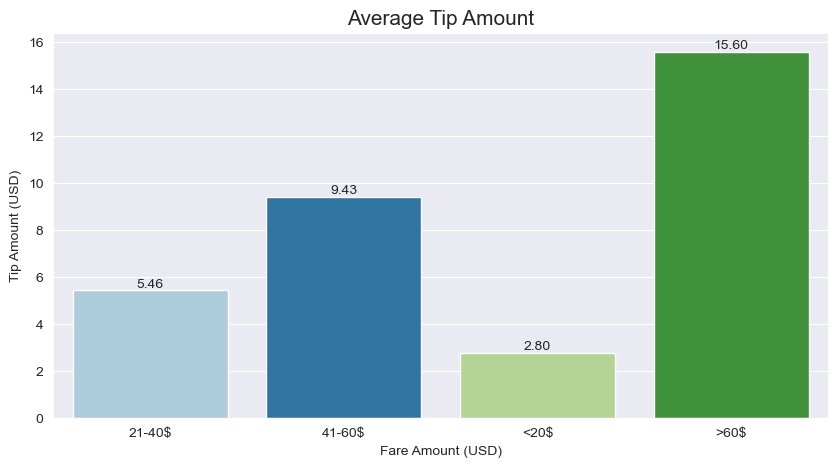

In [51]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_fare, x='fare_amount_bins', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.1
    label = "{:.2f}".format(ct_tip_fare['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Fare Amount (USD)')
plt.ylabel('Tip Amount (USD)')
plt.title('Average Tip Amount', fontsize=15)
plt.show()

**Hypothesis**:

**Ho**: Median tip pada fare amount <20$ = 21-40$ = 41-60$ = >60$

**Ha**: Median tip salah satu kelompok durasi memiliki nilai yang berbeda secara signifikan

In [52]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    tip_fare[tip_fare['fare_amount_bins'] == '<20$']['tip_amount'].sample(100, random_state=0),
    tip_fare[tip_fare['fare_amount_bins'] == '21-40$']['tip_amount'].sample(100, random_state=0),
    tip_fare[tip_fare['fare_amount_bins'] == '41-60$']['tip_amount'].sample(100, random_state=0),
    tip_fare[tip_fare['fare_amount_bins'] == '>60$']['tip_amount'].sample(100, random_state=0)
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 9.636778931277564e-37
Tolak H0


**Conclusion**: 

Kita cukup memiliki bukti bahwa pada tingkat signifikansi 5%, ada perbedaan signifikan dalam `tip_amount` antara setidaknya dua dari kategori dari fare amount. Dengan kata lain, `Fare amount mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan`.

`Insights:`

- Terdapat beberapa faktor yang mempengaruhi penumpang atau pelanggan memeberikan tip lebih besar.

- Faktor-faktor tersebut seperti jarak, durasi, kecepatan taksi, dan fare amount dimana semakin besar nilai jarak, durasi, kecepatan taksi, dan fare amount maka cenderung semakin besar tip yang diberikan.

- Selain itu, jenis tarif juga mempengerahi besarnya tip yang diberikan secara signifikan.

- Sementara faktor waktu seperti weekend/weekdays dan waktu pagi/siang/sore/malam tidak mempengeruhi jumlah tip yang diberikan.

# Conclusion and Recommendation

**Conclusion:**

`Permintaan dan Preferensi Pelanggan`

- Permintaan taksi paling tinggi di bulan januari terjadi pada hari Rabu, 25 Januari 2023, sedangkan permintaan terendah pada 1 Januari 2023.

- Terdapat pola permintaan pada bulan Januari, Permintaan cenderung naik selama weekdays kemudian menurun ketika memasuki hari weekend.

- Puncak permintaan terjadi di sore hari, sementara permintaan paling rendah di tengah malam hingga pagi hari.

- Manhattan adalah wilayah dengan permintaan tertinggi, sedangkan State Island memiliki permintaan terendah.

- Pelanggan lebih cenderung menggunakan taksi dengan jenis tarif dalam kota dengan trip type street-hail (pemanggilan taksi dipinggir jalan) dan metode pembayaran dominan menggunakan kartu kredit atau tunai.

- Durasi perjalanan yang paling umum adalah antara 11-20 menit dan jarak yang kurang dari 2 mil.

`Distribusi Pendapatan Berdasarkan Waktu dan Wilayah`

- Terdapat rute-rute yang permintaan dan rata-rata tarif yang juga tinggi seperti dari East Harlem North ke Upper West Side North.

- Tarif rata-rata cenderung lebih mahal di tengah malam dan lebih murah di malam hari.

- Brooklyn memiliki tarif rata-rata tertinggi di pagi hari, sementara Staten Island memiliki tarif rata-rata termurah dan tidak memiliki perjalanan sama sekali di malam hari.

- Wilayah Manhattan menampilkan pola harga yang stabil sepanjang hari.

- Tip tertinggi biasanya diberikan untuk rute ke Newark Airport, sementara tip sebagai proporsi dari fare amount tertinggi terjadi di rute menuju Battery Park.
    
`Faktor yang Mempengaruhi Tip`

- Jarak perjalanan (trip_distance), durasi perjalanan (trip_duration) dan total tarif (fare_amount) memiliki korelasi positif yang kuat dengan besarnya tip yang diberikan oleh pelanggan.

- Kecepatan berkendara juga memiliki korelasi positif, tetapi lemah dengan tip amount.

- Jenis tarif mempengaruhi besarnya tip yang diberikan secara signifikan.

- Waktu (baik berdasarkan hari maupun jam) tidak memiliki pengaruh signifikan terhadap besarnya tip yang diberikan oleh pelanggan.

**Kesimpulan Umum:**

Permintaan taksi lebih tinggi pada hari kerja dibandingkan weekend, dengan sore hari menjadi waktu yang paling sibuk. Manhattan mendominasi dalam hal volume perjalanan, dengan tarif perjalanan dalam kota menjadi pilihan utama pelanggan. Selain itu, tarif dan jarak perjalanan adalah faktor utama yang mempengaruhi besarnya tip yang diberikan oleh pelanggan.

**Rekomendasi:**

`Penjadwalan Armada Taksi`:

- Pastikan tersedianya armada taksi yang cukup pada weekdays, terutama antara hari Senin hingga Jumat, dengan fokus lebih pada hari Rabu dan Kamis.

- Tambahkan lebih banyak armada di sore hari pada pukul 15:00 hingga 18:00.

- Optimalisasi operasional taksi, kurangi operasi taksi pada hari weekend dan pada waktu tengah malam hingga dini hari.

`Penargetan Wilayah`:

- Tingkatkan jumlah taksi di wilayah Manhattan, Queens, dan Brooklyn karena memiliki permintaan yang lebih tinggi dibanding wilayah lain.

- Karena Brooklyn memiliki tarif rata-rata yang lebih tinggi di pagi hari, perusahaan taksi harus memastikan ketersediaan armada yang memadai di wilayah ini selama waktu tersebut.

- Mengkaji ulang alokasi armada di wilayah dengan permintaan rendah seperti Staten Island.

- Memberikan insentif atau bonus untuk driver yang beroperasi di wilayah dengan permintaan tinggi seperti Manhattan, Queens, Brooklyn.

`Strategi Berdasarkan Harga`:

- Prioritaskan layanan taksi pada rute-rute dengan fare amount rata-rata tertinggi seperti rute East Harlem North ke Upper West Side North, Upper Yorkville West, dan sebagainya.

- Pertimbangkan untuk penyesuaian tarif berdasarkan permintaan. Misalnya, naikkan tarif sebesar 1-3% saat puncak permintaan pada hari dan jam-jam tertentu.

- Tawarkan promo atau diskon pada saat-saat permintaan rendah, misalnya pada tengah malam atau awal pagi, untuk menarik lebih banyak pelanggan.

`Opsi Pembayaran`:

- Memastikan sistem pembayaran dengan credit card berfungsi dengan baik dan cepat mengingat ini menjadi pilihan pembayaran yang dominan.
    
- Pertimbangkan untuk menambah opsi pembayaran digital lain yang mungkin diminati pelanggan, seperti e-wallet atau aplikasi pembayaran digital lainnya.

`Peningkatan Kualitas Pelayanan`:

- Meskipun kecepatan berkendara memiliki korelasi yang lemah dengan tip, tetapi kecepatan berpengaruh terhadap jumlah tip yang diberikan. Maka penting untuk memastikan bahwa pengemudi berkendara dengan aman dan nyaman. Pelanggan mungkin memberikan tip lebih besar untuk perjalanan yang aman dan nyaman.

- Menambahkan program loyalitas atau diskon untuk pelanggan yang sering menggunakan taksi.

`Promosi dan Penawaran`:

- Luncurkan promosi khusus untuk rute dengan fare amount tertinggi untuk menarik lebih banyak pelanggan.

- Pertimbangkan untuk memberikan diskon atau penawaran khusus di waktu atau wilayah dengan fare amount rata-rata yang lebih rendah untuk menarik lebih banyak pelanggan.

- Tawarkan paket atau promosi untuk perjalanan dengan jarak dan durasi yang lebih lama, mengingat dua faktor ini juga memiliki korelasi positif dengan tip.